## Natural Language Processing (NLP) using NLTK and SpaCy modules

#### Install packages into Python environment

In [1]:
!pip install nltk
!pip install textblob
!pip install spacy

  Obtaining dependency information for textblob from https://files.pythonhosted.org/packages/02/07/5fd2945356dd839974d3a25de8a142dc37293c21315729a41e775b5f3569/textblob-0.18.0.post0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 626.3/626.3 kB 1.8 MB/s eta 0:00:0000:0100:01m
  Obtaining dependency information for spacy from https://files.pythonhosted.org/packages/c4/c5/1a4556a372ce1bd53f183d583126a6535cae6baa1b09b7028faf018c8a67/spacy-3.7.4-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for spacy-legacy<3.1.0,>=3.0.11 from https://files.pythonhosted.org/packages/c3/55/12e842c70ff8828e34e543a2c7176dac4da006ca6901c9e8b43efab8bc6b/spacy_legacy-3.0.12-py2.py3-none-any.whl.metadata
  Obtaining dependency information for spacy-loggers<2.0.0,>=1.0.0 from https://files.pythonhosted.org/packages/33/78/d1a1a026ef3af911159398c939b1509d5c36fe524c7b644f34a5146c4e16/spacy_loggers-1.0.5-py3-none-any.whl.metadata
  Obtaining dependency information 

#### import modules from packages

In [2]:
#from text.blob import TextBlob as tb (would get all of TextBlob)
#from BeautifulSoup import BeautifulSoup (would get all of BeautifulSoup)
#from nltk.stem.porter import PorterStemmer
# from nltk.stem.lancaster import LancasterStemmer
import pandas as pd
from pandas import DataFrame
from itertools import combinations
import numpy as np
from numpy import linalg as LA
import math
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
import string
import re
from nltk.corpus import stopwords	#IMPORT STOPWORDS CORPUS (have to get into lowercase)
from nltk.stem.lancaster import LancasterStemmer
st = LancasterStemmer()
from textblob import Word
import codecs
codecs.open
import io
io.open
import glob
import os

[nltk_data] Downloading package stopwords to /Users/sws/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
# Convert a collection of raw documents to a matrix of TF-IDF features.
#TF-IDF: Text Frequency-Inverse Document Frequency weights
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
# function to remove html tags from a html file
def stripAllTags( html ):
        if html is None:
                return None
        return ''.join( BeautifulSoup( html ).findAll( text = True ) )

[SpaCy](https://spacy.io)

In [5]:
import spacy
!python -m spacy download en_core_web_sm
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 3.2 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 2.8 MB/s eta 0:00:0000:0100:03
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


### Tokenization

In [7]:
nlp = spacy.load("en_core_web_sm")
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")
for token in doc:
    print(token.text, token.pos_, token.dep_)

Apple PROPN nsubj
is AUX aux
looking VERB ROOT
at ADP prep
buying VERB pcomp
U.K. PROPN dobj
startup NOUN dep
for ADP prep
$ SYM quantmod
1 NUM compound
billion NUM pobj


In [8]:
for token in doc:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
            token.shape_, token.is_alpha, token.is_stop)

Apple Apple PROPN NNP nsubj Xxxxx True False
is be AUX VBZ aux xx True True
looking look VERB VBG ROOT xxxx True False
at at ADP IN prep xx True True
buying buy VERB VBG pcomp xxxx True False
U.K. U.K. PROPN NNP dobj X.X. False False
startup startup NOUN NN dep xxxx True False
for for ADP IN prep xxx True True
$ $ SYM $ quantmod $ False False
1 1 NUM CD compound d False False
billion billion NUM CD pobj xxxx True False


![alt text](spacy_lem.png "SpaCy tokens")

In [9]:
from spacy import displacy
displacy.render(doc, style="dep", jupyter=True)

### Example: Process full document

Example using SpaCy to process entire document
Here we are iterating through the nouns and verbs using the method noun_chunks

In [11]:
# Process whole documents
text = ("When Sebastian Thrun started working on self-driving cars at "
        "Google in 2007, few people outside of the company took him "
        "seriously. “I can tell you very senior CEOs of major American "
        "car companies would shake my hand and turn away because I wasn’t "
        "worth talking to,” said Thrun, in an interview with Recode earlier "
        "this week.")
doc = nlp(text)

# Analyze syntax
print("Noun phrases:", [chunk.text for chunk in doc.noun_chunks])
print("Verbs:", [token.lemma_ for token in doc if token.pos_ == "VERB"])

# Find named entities, phrases and concepts
for entity in doc.ents:
    print(entity.text, entity.label_)

Noun phrases: ['Sebastian Thrun', 'self-driving cars', 'Google', 'few people', 'the company', 'him', 'I', 'you', 'very senior CEOs', 'major American car companies', 'my hand', 'I', 'Thrun', 'an interview', 'Recode']
Verbs: ['start', 'work', 'drive', 'take', 'tell', 'shake', 'turn', 'talk', 'say']
Sebastian Thrun PERSON
Google ORG
2007 DATE
American NORP
Thrun PERSON
Recode ORG
earlier this week DATE


In [12]:
#generate a list of nouns
[chunk.text for chunk in doc.noun_chunks]

['Sebastian Thrun',
 'self-driving cars',
 'Google',
 'few people',
 'the company',
 'him',
 'I',
 'you',
 'very senior CEOs',
 'major American car companies',
 'my hand',
 'I',
 'Thrun',
 'an interview',
 'Recode']

##### Scanning text for parts of speech (pos)

In [13]:
for token in doc:
    print(token.text, token.pos_)

When SCONJ
Sebastian ADJ
Thrun PROPN
started VERB
working VERB
on ADP
self NOUN
- PUNCT
driving VERB
cars NOUN
at ADP
Google PROPN
in ADP
2007 NUM
, PUNCT
few ADJ
people NOUN
outside ADP
of ADP
the DET
company NOUN
took VERB
him PRON
seriously ADV
. PUNCT
“ PUNCT
I PRON
can AUX
tell VERB
you PRON
very ADV
senior ADJ
CEOs NOUN
of ADP
major ADJ
American ADJ
car NOUN
companies NOUN
would AUX
shake VERB
my PRON
hand NOUN
and CCONJ
turn VERB
away ADV
because SCONJ
I PRON
was AUX
n’t PART
worth ADJ
talking VERB
to ADP
, PUNCT
” PUNCT
said VERB
Thrun PROPN
, PUNCT
in ADP
an DET
interview NOUN
with ADP
Recode PROPN
earlier ADV
this DET
week NOUN
. PUNCT


#### load large model and define function to clean text

In [14]:
nlp = spacy.load("en_core_web_lg")

#### Function definition

Function below makes text lowercase, removes stopwords (shown below), removes punctuation, and pronouns.

In [16]:
def clean(text):
    doc = nlp(text.lower())
    result = []
    for token in doc:
        if token.text in nlp.Defaults.stop_words:
            continue
        if token.is_punct:
            continue
        if token.lemma_ == '-PRON-':
            continue
        result.append(token.lemma_)
    return " ".join(result)

#### show stopwords

In [17]:
print(nlp.Defaults.stop_words)

{'so', 'was', 'would', 'seemed', 'he', "'ve", 'as', 'several', 'fifteen', 'seems', 'six', 'together', 'unless', 'if', 'eight', 'n’t', 'has', 'your', 'fifty', 'among', 'thereupon', 'back', 'too', 'anyone', 'with', 'but', 'again', 'noone', 'get', 'it', 'they', 'also', 'such', 'why', 'whereafter', 'did', '’re', 'are', 'seeming', 'various', 'nevertheless', 'behind', 'across', 'within', 'just', 'a', "n't", 'since', 'thereafter', 'wherever', 'being', 'him', 'sometimes', 'somehow', 'eleven', 'used', 'many', "'m", 'from', 'on', 'moreover', 'whoever', 'although', 'see', '‘d', 'ourselves', 'due', 'say', 'more', 'all', 'mine', 'no', 'there', "'re", 'serious', 'empty', 'anything', '‘ll', 'elsewhere', 'when', 'could', 'hundred', 'for', 'whose', 'becoming', "'s", 'does', 'their', 'otherwise', 'then', 'latter', 'yours', 'should', 'beyond', 'alone', 'in', 'other', 'hence', '’ll', 'were', 'both', 'thereby', 'whereby', 'while', 'either', 'top', 'whole', 'this', 'them', 'though', '‘s', 'during', 'thru', 

### Example descriptions

#### note: RecargaPay and Cardup are startups in Mastercard Accelerator

In [18]:
recargapay = 'RecargaPay is a Brazilian company that offers a mobile payment platform and wallet. \
It aims to simplify daily transactions such as mobile top-ups, bill payments, gift cards and more.'

In [19]:
cardup = 'CardUp is a platform that enables users to pay for big-ticket items, such as rent and insurance,  \
sans friction by using a credit card. With each payment, users earn points and miles. \
Users can unlock additional benefits such as discounted house moving services, free rent for a month, or vouchers for school supplies. \
Uses sign up, schedule their payment, Cardup makes the payment for the specified amount plus a processing fee, \
and the user receives a notification when the payment is made.'

#### Text similarity with and without clean

Cosine similarity *without* applying clean

In [20]:
nlp(cardup).similarity(nlp(recargapay))

0.9500017414112923

Cosine similarity applying clean

In [21]:
nlp(clean(cardup)).similarity(nlp(clean(recargapay)))

0.8670032453704243

#### now add another to compare

In [23]:
tink = 'Tink enables banks to become data-driven, capture the opportunities of open banking, \
and deliver a more personal, intelligent financial experience to their users. Tink provides APIs \
as building blocks to create banking services. The company\'s products include account aggregation, \
categorization, payment initiation, and personal finance management.On June 24th, 2021, \
Tink was acquired by Visa at a valuation of $2.15B.'

In [24]:
nlp(cardup).similarity(nlp(tink))

0.9290815889208894

In [25]:
nlp(recargapay).similarity(nlp(tink))

0.9037514320730176

In [26]:
nlp(clean(recargapay)).similarity(nlp(clean(tink)))

0.8182076539503474

#### Another example: Brown dogs, orange dogs, and startups

In [31]:
browndog = 'the quick brown dog goes to the zoo'

In [32]:
orangedog = 'Phineas is a dog'

In [43]:
orangedog2 = 'the dog Phineas is orange'

In [37]:
nlp(orangedog).similarity(nlp(browndog))

0.5193408861805141

In [39]:
clean(orangedog)

'phinea dog'

In [40]:
clean(browndog)

'quick brown dog go zoo'

In [44]:
clean(orangedog2)

'dog phinea orange'

In [38]:
nlp(clean(orangedog)).similarity(nlp(clean(browndog)))

0.6876750452670322

In [33]:
nlp(cardup).similarity(nlp(browndog))

0.6902693035581375

In [34]:
nlp(clean(cardup)).similarity(nlp(clean(browndog)))

0.27537951783626263

In [35]:
nlp(cardup).similarity(nlp(orangedog))

0.524149714149306

In [36]:
nlp(clean(cardup)).similarity(nlp(clean(orangedog)))

0.08210328111666544

#### Exercise: Now try comparing two texts yourself.
- add in text in place of elipses (...) below

In [ ]:
text1 = ... 

In [ ]:
text2 = ...

In [ ]:
nlp(text1).similarity(nlp(text2))

In [ ]:
nlp(clean(text1)).similarity(nlp(clean(text2)))

***

#### note: Hyro is a startup in Deloitte Accelerator

In [45]:
hyro = 'Hyro provides a conversational AI program that \
           allows businesses to better interact with customers. \
           Through machine learning, the program keeps customer engagement \
           at a high level and optimizes digital interactions.'

In [46]:
nlp(clean(hyro))

hyro provide conversational ai program             allow business well interact customer             machine learning program keep customer engagement             high level optimize digital interaction

In [47]:
nlp(cardup).similarity(nlp(hyro))

0.9128976037519698

In [48]:
nlp(clean(cardup)).similarity(nlp(clean(hyro)))

0.7767658932783136

## Research example

#### note: this function was also defined above

In [49]:
def clean(text):
    doc = nlp(text.lower())
    result = []
    for token in doc:
        if token.text in nlp.Defaults.stop_words:
            continue
        if token.is_punct:
            continue
        if token.lemma_ == '-PRON-':
            continue
        result.append(token.lemma_)
    return " ".join(result)

In [50]:
# Files
file="nordeavc.csv"
file="nordeaacc.csv"
df=pd.read_csv(file, sep=',').fillna(value = 0)
print(df['Description'][1])
df['Description_processed'] = df['Description'].apply(lambda x: clean(x))
print('\nDescription with punctuation and stopwords---\n_______________________')
print(df['Description_processed'][1])

Kuan is a financial technology firm offering peer to peer foreign exchange services for businesses. The company offers instant matching services through the online platform that gives clients access to live mid-market rates. Kuan helps businesses to eliminate all the hidden banking fees they have been paying, letting companies send money abroad using real exchange rate at the lowest possible cost whilst improving their working capital.

Description with punctuation and stopwords---
_______________________
kuan financial technology firm offer peer peer foreign exchange service business company offer instant matching service online platform give client access live mid market rate kuan help business eliminate hidden banking fee pay let company send money abroad real exchange rate low possible cost whilst improve work capital


### Now process all companies in portfolio

In [52]:
shape=df.shape
n=shape[0] #number of rows
score=np.zeros((n,n)) #making array with scores, set to 0 to start
ix=range(0,n) #index 0 to n
cix=list(combinations(ix, 2)) #all possible combinations
# print(cix)
num=len(cix)
slist=[] #empty list

In [53]:
for i, j in cix:
    desc1 = nlp(clean(df['Description_processed'][i]))
    desc2 = nlp(clean(df['Description_processed'][j]))
    score[i,j]=desc1.similarity(desc2)
    slist.append(desc1.similarity(desc2))

In [54]:
print("Score matrix: ",score.shape)
print("\n",score[0,0],score[0,1])
# Want all the cross scores without double counting then draw histogram and stats
dfscore= pd.DataFrame(slist) 
stats_numeric = dfscore.describe()
print("Statistics")
print (stats_numeric)

Score matrix:  (19, 19)

 0.0 0.7778170715486388
Statistics
                0
count  171.000000
mean     0.861352
std      0.059965
min      0.724803
25%      0.816298
50%      0.871209
75%      0.909765
max      0.955992


In [55]:
dfscore

,0
0,0.777817
1,0.741942
2,0.871062
3,0.821935
4,0.882558
...,...
166,0.834738
167,0.858938
168,0.855843
169,0.915042


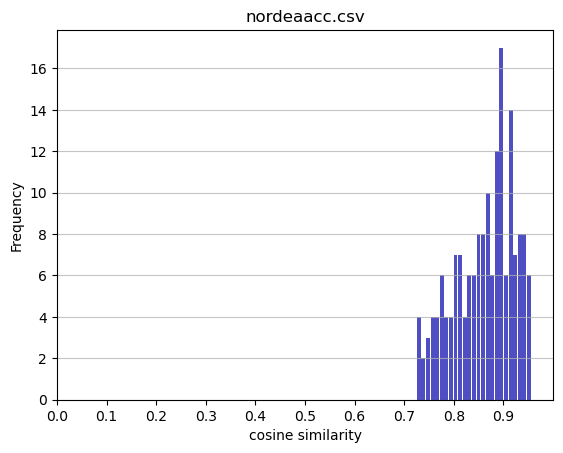

In [56]:
m, bins, patches = plt.hist(x=slist, bins=25, color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlim(0,1.0)
plt.xticks(np.arange(0, 1, step=0.1))
plt.xlabel('cosine similarity')
plt.ylabel('Frequency')
plt.title(file)
#plt.text(23, 45, r'$\mu=15, b=3$')

plt.show()